# Eksplorasi Dataset

In [102]:
import pandas as pd

# Load dataset
file_path = "simulated_call_centre.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51708 entries, 0 to 51707
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   call_id         51708 non-null  int64 
 1   date            51708 non-null  object
 2   daily_caller    51708 non-null  int64 
 3   call_started    51708 non-null  object
 4   call_answered   51708 non-null  object
 5   call_ended      51708 non-null  object
 6   wait_length     51708 non-null  int64 
 7   service_length  51708 non-null  int64 
 8   meets_standard  51708 non-null  bool  
dtypes: bool(1), int64(4), object(4)
memory usage: 3.2+ MB


(None,
    call_id        date  daily_caller call_started call_answered  call_ended  \
 0        1  2021-01-01             1   8:00:00 AM    8:00:00 AM  8:14:22 AM   
 1        2  2021-01-01             2   8:02:42 AM    8:02:42 AM  8:07:31 AM   
 2        3  2021-01-01             3   8:08:24 AM    8:08:24 AM  8:10:13 AM   
 3        4  2021-01-01             4   8:09:37 AM    8:09:37 AM  8:13:45 AM   
 4        5  2021-01-01             5   8:11:10 AM    8:11:10 AM  8:15:28 AM   
 
    wait_length  service_length  meets_standard  
 0            0             863            True  
 1            0             289            True  
 2            0             108            True  
 3            0             247            True  
 4            0             258            True  )

# Menghitung rata-rata tingkat kedatangan pelanggan dan rata-rata tingkat layanan berdasarkan dataset

In [103]:
import pandas as pd
import numpy as np

# Membaca dataset
df = pd.read_csv("simulated_call_centre.csv")  # Ganti dengan nama file yang benar

# Gabungkan kolom 'date' dengan 'call_started' untuk mendapatkan datetime lengkap
df['datetime_started'] = df['date'] + " " + df['call_started']

# Konversi ke tipe datetime dengan format yang sesuai
df['datetime_started'] = pd.to_datetime(df['datetime_started'], format='%Y-%m-%d %I:%M:%S %p', errors='coerce')

# Hitung rata-rata tingkat kedatangan (λ) per detik
total_calls = len(df)
total_time_seconds = (df['datetime_started'].max() - df['datetime_started'].min()).total_seconds()
arrival_rate_lambda = total_calls / total_time_seconds

# Pastikan service_length bertipe numerik
df['service_length'] = pd.to_numeric(df['service_length'], errors='coerce')

# Hitung rata-rata tingkat layanan (μ) per detik
service_rate_mu = 1 / df['service_length'].mean()

# Tampilkan hasil
print("Arrival Rate (λ):", arrival_rate_lambda)
print("Service Rate (μ):", service_rate_mu)


Arrival Rate (λ): 0.001642280040380499
Service Rate (μ): 0.003343334412905938


# Simulasi Sistem Antrean

In [104]:
import numpy as np
import pandas as pd

# Pastikan datetime sudah dikonversi dengan benar
df['datetime_started'] = pd.to_datetime(df['date'] + " " + df['call_started'], format='%Y-%m-%d %I:%M:%S %p', errors='coerce')

# Ambil waktu kedatangan asli dari dataset
arrival_times = df['datetime_started'].values
service_times = df['service_length'].values

# Jumlah pelanggan yang akan disimulasikan
num_simulations = len(arrival_times)

# Menentukan waktu mulai layanan dan waktu tunggu berdasarkan antrean asli
service_start_times = np.zeros(num_simulations, dtype='datetime64[ns]')
wait_times = np.zeros(num_simulations)

# Set waktu awal agen layanan (1 agen terlebih dahulu)
service_start_times[0] = arrival_times[0]

for i in range(1, num_simulations):
    service_start_times[i] = max(arrival_times[i], service_start_times[i-1] + np.timedelta64(int(service_times[i-1]), 's'))
    wait_times[i] = (service_start_times[i] - arrival_times[i]).astype('timedelta64[s]')

# Menentukan waktu selesai layanan
service_end_times = service_start_times + np.timedelta64(1, 's') * service_times

# Membuat DataFrame hasil simulasi berbasis data asli
simulated_df = pd.DataFrame({
    'call_id': df['call_id'],
    'arrival_time': arrival_times,
    'wait_time': wait_times,
    'service_start': service_start_times,
    'service_time': service_times,
    'service_end': service_end_times
})

# Menampilkan hasil simulasi
simulated_df.head()


,call_id,arrival_time,wait_time,service_start,service_time,service_end
0,1,2021-01-01 08:00:00,0.0,2021-01-01 08:00:00,863,2021-01-01 08:14:23
1,2,2021-01-01 08:02:42,701.0,2021-01-01 08:14:23,289,2021-01-01 08:19:12
2,3,2021-01-01 08:08:24,648.0,2021-01-01 08:19:12,108,2021-01-01 08:21:00
3,4,2021-01-01 08:09:37,683.0,2021-01-01 08:21:00,247,2021-01-01 08:25:07
4,5,2021-01-01 08:11:10,837.0,2021-01-01 08:25:07,258,2021-01-01 08:29:25


# Analisis Performa Sistem Antrean Call Center

In [105]:
# Menghitung metrik tambahan
median_wait_time = simulated_df['wait_time'].median()  # Median waktu tunggu
std_wait_time = simulated_df['wait_time'].std()  # Standar deviasi waktu tunggu

median_service_time = simulated_df['service_time'].median()  # Median waktu layanan
std_service_time = simulated_df['service_time'].std()  # Standar deviasi waktu layanan

# Analisis korelasi antara waktu tunggu dan waktu layanan
correlation_wait_service = simulated_df[['wait_time', 'service_time']].corr().iloc[0, 1]

# Menampilkan hasil analisis tambahan dengan format stylish
output = f"""
🔍 **Analisis Statistik Waktu Tunggu & Waktu Layanan**
------------------------------------------------------
📌 **Waktu Tunggu (detik):**
   - 🏅 Median  : {median_wait_time:.2f}
   - 📏 Std Dev : {std_wait_time:.2f}

📌 **Waktu Layanan (detik):**
   - 🏅 Median  : {median_service_time:.2f}
   - 📏 Std Dev : {std_service_time:.2f}

📌 **Korelasi antara Waktu Tunggu & Waktu Layanan:**  
   🔗 {correlation_wait_service:.2f}
------------------------------------------------------
"""

print(output)

# Menghitung rata-rata dan median waktu tunggu
avg_wait_time = simulated_df['wait_time'].mean()
median_wait_time = simulated_df['wait_time'].median()
# Periksa apakah nilainya sudah dihitung dengan benar
print(f"Rata-rata waktu tunggu: {avg_wait_time:.2f} detik")
print(f"Median waktu tunggu: {median_wait_time:.2f} detik")




🔍 **Analisis Statistik Waktu Tunggu & Waktu Layanan**
------------------------------------------------------
📌 **Waktu Tunggu (detik):**
   - 🏅 Median  : 10818.00
   - 📏 Std Dev : 11203.24

📌 **Waktu Layanan (detik):**
   - 🏅 Median  : 208.00
   - 📏 Std Dev : 299.87

📌 **Korelasi antara Waktu Tunggu & Waktu Layanan:**  
   🔗 -0.02
------------------------------------------------------

Rata-rata waktu tunggu: 13809.44 detik
Median waktu tunggu: 10818.00 detik


# Visualisasi Data untuk Memahami Pola Antrean

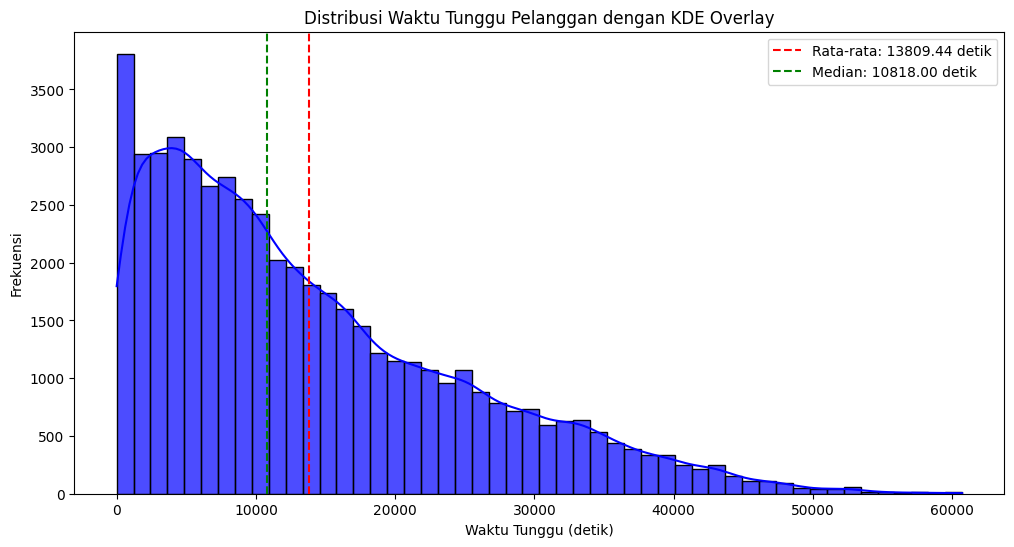

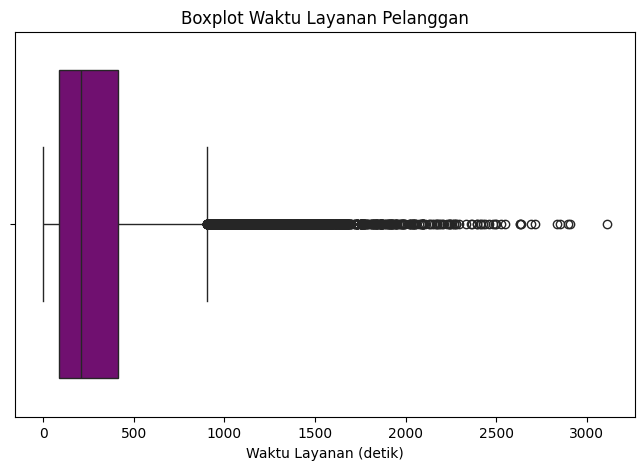

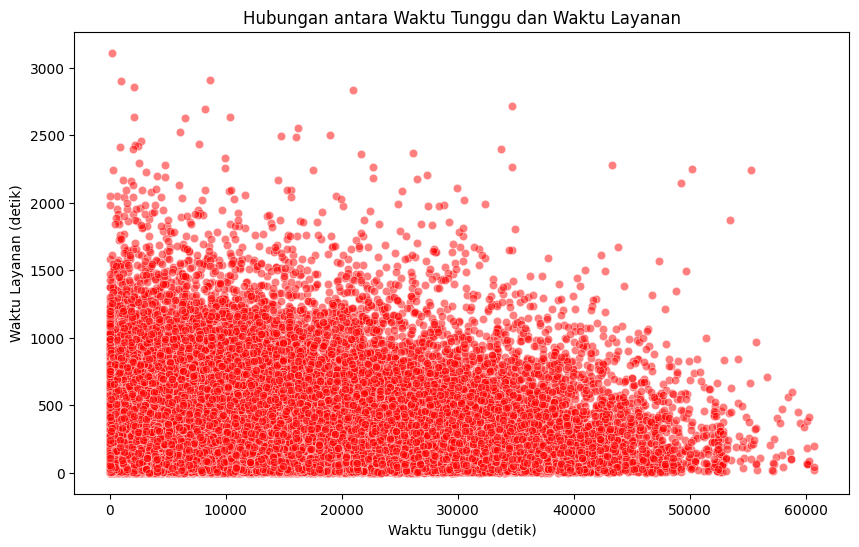

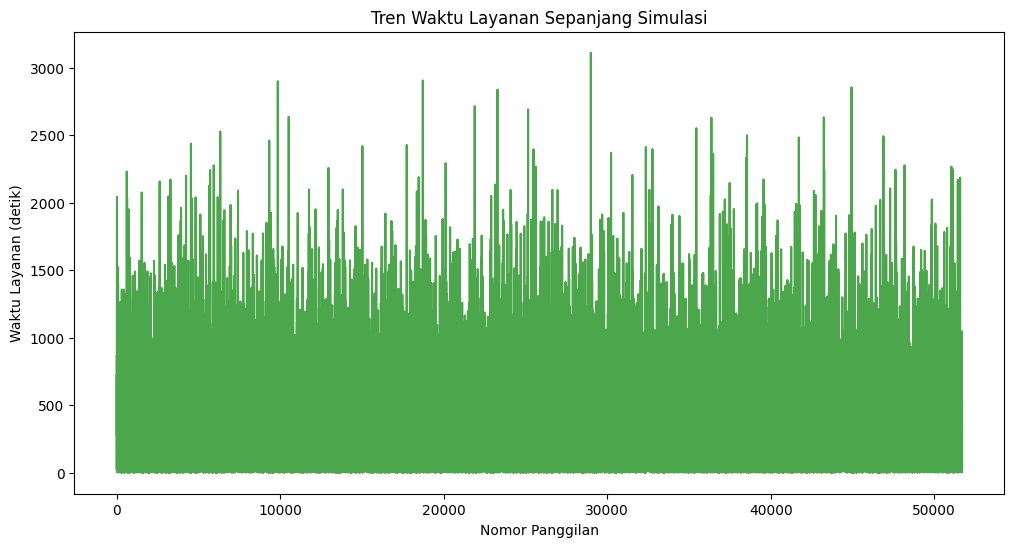

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Distribusi Waktu Tunggu dengan KDE
plt.figure(figsize=(12, 6))
sns.histplot(simulated_df['wait_time'], bins=50, kde=True, color='blue', alpha=0.7)
plt.axvline(avg_wait_time, color='red', linestyle='dashed', label=f'Rata-rata: {avg_wait_time:.2f} detik')
plt.axvline(median_wait_time, color='green', linestyle='dashed', label=f'Median: {median_wait_time:.2f} detik')
plt.xlabel("Waktu Tunggu (detik)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Waktu Tunggu Pelanggan dengan KDE Overlay")
plt.legend()
plt.show()

# Boxplot Waktu Layanan
plt.figure(figsize=(8, 5))
sns.boxplot(x=simulated_df['service_time'], color='purple')
plt.xlabel("Waktu Layanan (detik)")
plt.title("Boxplot Waktu Layanan Pelanggan")
plt.show()

# Scatter Plot Korelasi Waktu Tunggu vs Waktu Layanan
plt.figure(figsize=(10, 6))
sns.scatterplot(x=simulated_df['wait_time'], y=simulated_df['service_time'], alpha=0.5, color='red')
plt.xlabel("Waktu Tunggu (detik)")
plt.ylabel("Waktu Layanan (detik)")
plt.title("Hubungan antara Waktu Tunggu dan Waktu Layanan")
plt.show()

# Tren Waktu Layanan Sepanjang Simulasi
plt.figure(figsize=(12, 6))
sns.lineplot(x=simulated_df.index, y=simulated_df['service_time'], color='green', alpha=0.7)
plt.xlabel("Nomor Panggilan")
plt.ylabel("Waktu Layanan (detik)")
plt.title("Tren Waktu Layanan Sepanjang Simulasi")
plt.show()


# Modify Parameters and Optimize

In [107]:
def simulate_mm_c_real_data(num_agents):
    """
    Simulasi antrean multi-server (M/M/c) berdasarkan dataset asli.
    """
    agent_available_times = np.zeros(num_agents, dtype='datetime64[ns]')
    service_start_times = np.zeros(len(arrival_times), dtype='datetime64[ns]')
    wait_times = np.zeros(len(arrival_times))

    for i in range(len(arrival_times)):
        earliest_agent = np.argmin(agent_available_times)  # Cari agen yang tersedia lebih dulu
        service_start_times[i] = max(arrival_times[i], agent_available_times[earliest_agent])
        
        # ✅ Perbaikan: Gunakan .astype('timedelta64[s]') untuk konversi ke detik
        wait_times[i] = (service_start_times[i] - arrival_times[i]).astype('timedelta64[s]')
        
        agent_available_times[earliest_agent] = service_start_times[i] + np.timedelta64(int(service_times[i]), 's')

    service_end_times = service_start_times + np.timedelta64(1, 's') * service_times

    return pd.DataFrame({
        'call_id': df['call_id'],
        'arrival_time': arrival_times,
        'wait_time': wait_times,
        'service_start': service_start_times,
        'service_time': service_times,
        'service_end': service_end_times
    })

# Simulasi untuk 1, 2, 3, dan 5 agen layanan
num_agents_list = [1, 2, 3, 4, 5]
results = {n: simulate_mm_c_real_data(n) for n in num_agents_list}

# Menghitung rata-rata waktu tunggu untuk tiap skenario
wait_times = {n: results[n]['wait_time'].mean() for n in num_agents_list}

# Menampilkan hasil optimasi
print("Hasil Optimasi dengan Data Asli:")
for n in num_agents_list:
    print(f"{n} Agen: Rata-rata Waktu Tunggu = {wait_times[n]:.2f} detik")


# Menghitung utilisasi agen untuk tiap jumlah agen layanan
utilization = {n: arrival_rate_lambda / (n * service_rate_mu) for n in num_agents_list}

# Menampilkan hasil utilisasi agen
print("\n🔹 Utilisasi Agen untuk Tiap Skema:")
for n in num_agents_list:
    print(f"{n} Agen: Utilisasi = {utilization[n]:.2%}")



Hasil Optimasi dengan Data Asli:
1 Agen: Rata-rata Waktu Tunggu = 13809.44 detik
2 Agen: Rata-rata Waktu Tunggu = 1139.16 detik
3 Agen: Rata-rata Waktu Tunggu = 96.18 detik
4 Agen: Rata-rata Waktu Tunggu = 16.85 detik
5 Agen: Rata-rata Waktu Tunggu = 3.52 detik

🔹 Utilisasi Agen untuk Tiap Skema:
1 Agen: Utilisasi = 49.12%
2 Agen: Utilisasi = 24.56%
3 Agen: Utilisasi = 16.37%
4 Agen: Utilisasi = 12.28%
5 Agen: Utilisasi = 9.82%


# Plot Additional Insights


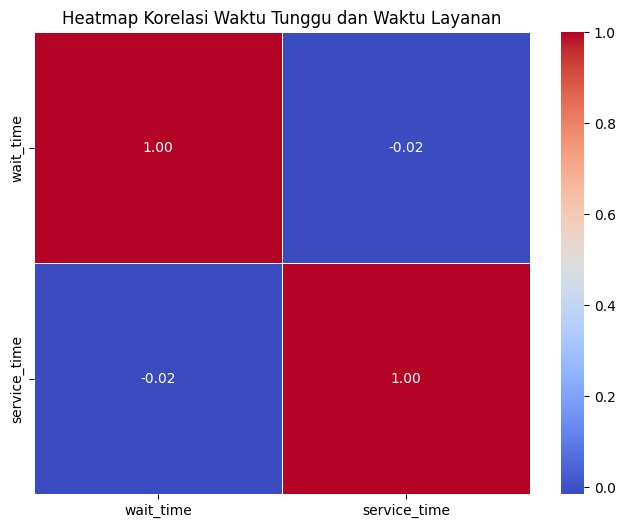

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung korelasi antar variabel numerik dalam dataset hasil simulasi
correlation_matrix = simulated_df[['wait_time', 'service_time']].corr()

# Plot heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Waktu Tunggu dan Waktu Layanan")
plt.show()


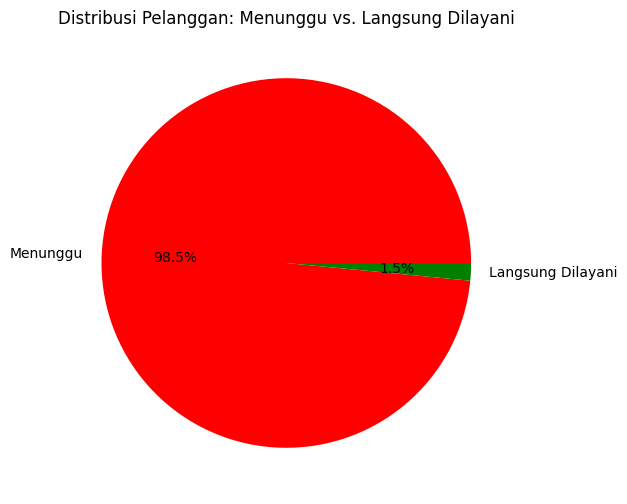

In [109]:
# Membuat kategori pelanggan berdasarkan waktu tunggu
simulated_df['wait_category'] = simulated_df['wait_time'].apply(lambda x: 'Menunggu' if x > 0 else 'Langsung Dilayani')

# Plot pie chart distribusi pelanggan
plt.figure(figsize=(6, 6))
simulated_df['wait_category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'green'])
plt.ylabel("")
plt.title("Distribusi Pelanggan: Menunggu vs. Langsung Dilayani")
plt.show()


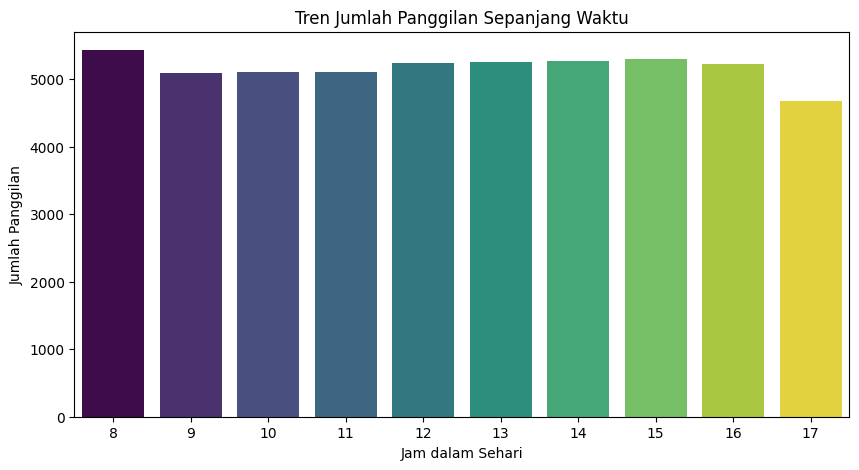

In [110]:
# Konversi arrival_time ke format datetime jika belum
simulated_df['arrival_time'] = pd.to_datetime(simulated_df['arrival_time'])

# Buat kolom jam untuk analisis tren
simulated_df['hour'] = simulated_df['arrival_time'].dt.hour

# Plot jumlah panggilan per jam dengan perbaikan
plt.figure(figsize=(10, 5))
sns.countplot(x=simulated_df['hour'], hue=simulated_df['hour'], palette="viridis", legend=False)
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Panggilan")
plt.title("Tren Jumlah Panggilan Sepanjang Waktu")
plt.xticks(rotation=0)
plt.show()
